[[1.]]


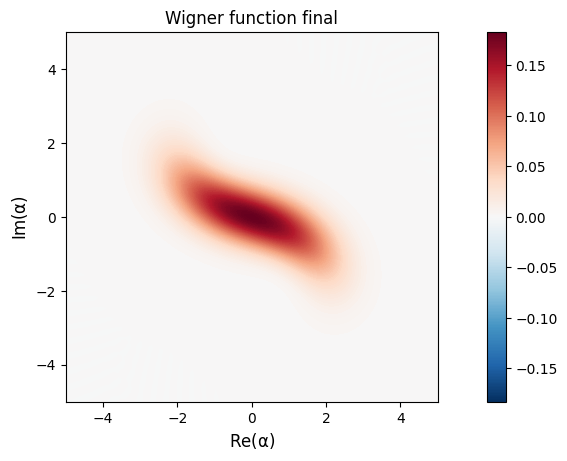

Time     | <X>        | <P>        | <n>        | <Parity>  
-----------------------------------------------------------------
0.0000   | 0.000000   | 0.000000   | 0.000000   | 1.000000
0.0100   | 0.000000   | 0.000000   | 0.001685   | 0.999892
0.0200   | 0.000000   | 0.000000   | 0.006323   | 0.999212
0.0300   | 0.000000   | 0.000000   | 0.013365   | 0.997590
0.0400   | 0.000000   | 0.000000   | 0.022358   | 0.994821
0.0500   | 0.000000   | 0.000000   | 0.032923   | 0.990833
0.0600   | 0.000000   | 0.000000   | 0.044748   | 0.985647
0.0700   | 0.000000   | 0.000000   | 0.057573   | 0.979349
0.0800   | 0.000000   | 0.000000   | 0.071181   | 0.972068
0.0900   | 0.000000   | 0.000000   | 0.085394   | 0.963955
0.1000   | 0.000000   | 0.000000   | 0.100063   | 0.955169
0.1100   | 0.000000   | 0.000000   | 0.115064   | 0.945864
0.1200   | 0.000000   | 0.000000   | 0.130295   | 0.936185
0.1300   | 0.000000   | 0.000000   | 0.145671   | 0.926261
0.1400   | 0.000000   | 0.000000   | 0.161119  

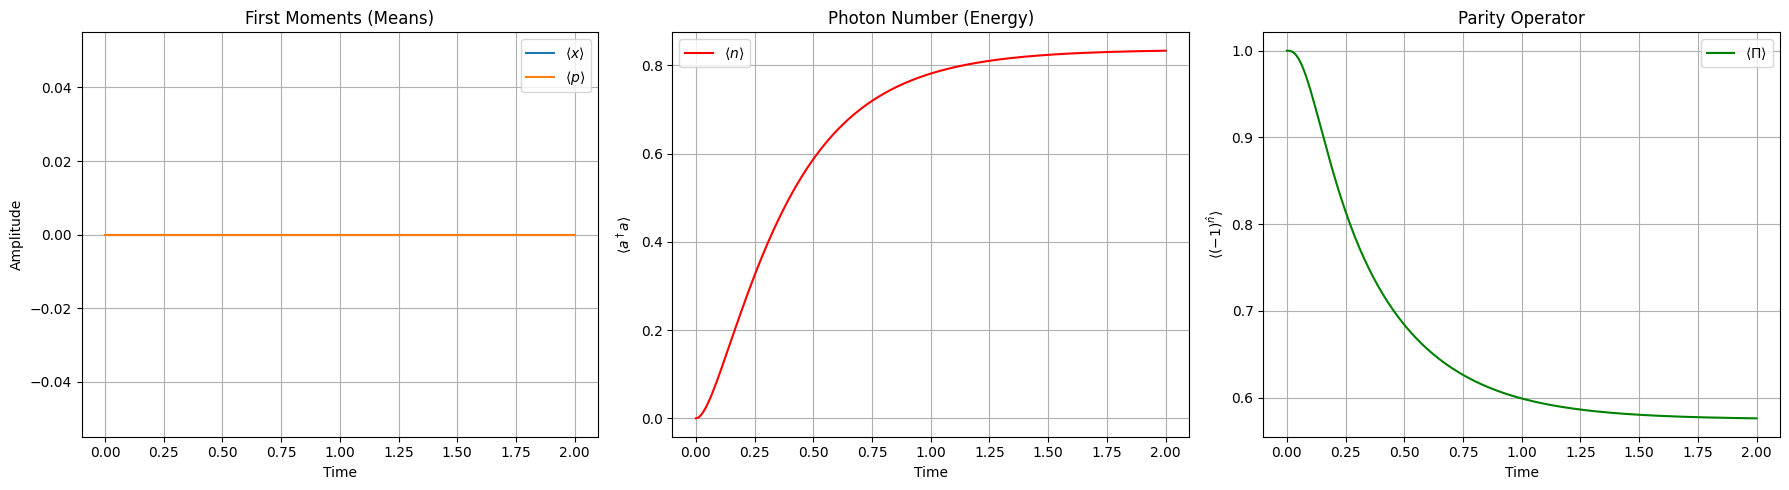

In [ ]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
# Identical to your JAX setup
G = 3 + 3j    # Two-photon drive strength
delta = 1       # Detuning
U = 1         # Kerr nonlinearity
gamma = 10      # Single-photon loss rate

# Simulation parameters
N = 100            # Hilbert space cutoff (must be high enough to capture squeezing)
t_start = 0.0
t_end = 2
steps = 201       # Higher resolution than the Euler step
tlist = np.linspace(t_start, t_end, steps)

# --- 2. Operators ---
a = qt.destroy(N)
n_op = a.dag() * a
x_op = (a + a.dag()) / np.sqrt(2) # Position quadrature
p_op = 1j * (a.dag() - a) / np.sqrt(2) # Momentum quadrature

# Parity operator defined as exp(i * pi * n)
# Equivalently, it is a diagonal matrix with entries (-1)^n
parity_op = (1j * np.pi * n_op).expm() 

# --- 3. Hamiltonian Construction ---
# H_detuning = delta * a^dag * a
H_det = -delta * n_op

# H_kerr = (U/2) * a^dag^2 * a^2 (Standard Kerr form)
H_kerr = 0.5 * U * a.dag()**2 * a**2

# H_drive = G * a^dag^2 + G* * a^2 (Two-photon drive)
# Note: In some conventions, this might be i(G a^dag^2 - G* a^2).
# Based on your JAX summation, it implies a direct Hermitian addition:
H_drive = (G/2 * a.dag()**2) + (np.conj(G)/2 * a**2)

# Total Hamiltonian
# To simulate the "Only G term" case, set delta=0 and U=0 here.
H = H_drive + H_det + H_kerr

# --- 4. Dissipation ---
# Single photon loss: sqrt(gamma) * a
c_ops = [np.sqrt(gamma) * a]

# --- 5. Initial State ---
# Vacuum state
psi0 = (qt.coherent(N, 2) + qt.coherent(N, -2)).unit()
psi0 = qt.basis(N, 0)

print(np.pi*qt.wigner(psi0, 0, 0))

# --- 6. Solve Master Equation ---
result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=[x_op, p_op, n_op, parity_op], options={"store_final_state":True})

# --- 7. Plotting & Verification ---
means_x = result.expect[0]
means_p = result.expect[1]
means_n = result.expect[2]
means_parity = result.expect[3]

fig, ax = qt.plot_wigner(result.final_state, xvec=np.linspace(-5,5,100), yvec=np.linspace(-5,5,100), colorbar=True, cmap='RdBu_r')


# Add plot customizations (optional)
ax.set_title("Wigner function final")
plt.show()

print(f"{'Time':<8} | {'<X>':<10} | {'<P>':<10} | {'<n>':<10} | {'<Parity>':<10}")
print("-" * 65)
for i in range(0, len(tlist), 1): # Print every 10th step
    print(f"{tlist[i]:.4f}   | {means_x[i]:.6f}   | {means_p[i]:.6f}   | {means_n[i]:.6f}   | {means_parity[i]:.6f}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Means
ax[0].plot(tlist, means_x, label=r'$\langle x \rangle$')
ax[0].plot(tlist, means_p, label=r'$\langle p \rangle$')
ax[0].set_title("First Moments (Means)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

# Plot Photon Number
ax[1].plot(tlist, means_n, label=r'$\langle n \rangle$', color='r')
ax[1].set_title("Photon Number (Energy)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel(r"$\langle a^\dagger a \rangle$")
ax[1].legend()
ax[1].grid(True)

# Plot Parity
ax[2].plot(tlist, means_parity, label=r'$\langle \Pi \rangle$', color='g')
ax[2].set_title("Parity Operator")
ax[2].set_xlabel("Time")
ax[2].set_ylabel(r"$\langle (-1)^{\hat{n}} \rangle$")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

[[1.]]


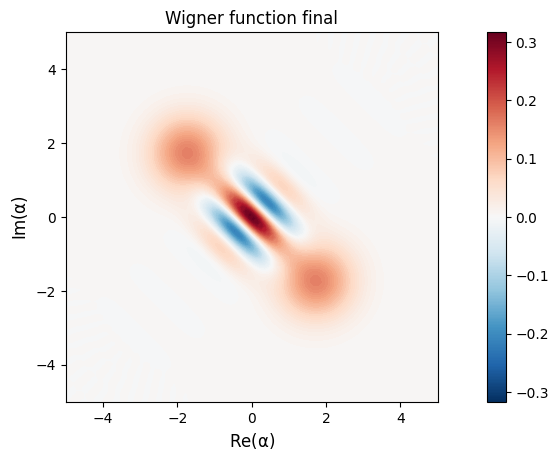

Time     | <X>        | <P>        | <n>        | <Parity>  
-----------------------------------------------------------------
0.0000   | 0.000000   | 0.000000   | 0.000000   | 1.000000
0.0010   | 0.000000   | 0.000000   | 0.001783   | 1.000000
0.0020   | 0.000000   | 0.000000   | 0.007073   | 1.000000
0.0030   | 0.000000   | 0.000000   | 0.015793   | 1.000000
0.0040   | 0.000000   | 0.000000   | 0.027882   | 1.000000
0.0050   | 0.000000   | 0.000000   | 0.043286   | 1.000000
0.0060   | 0.000000   | 0.000000   | 0.061954   | 1.000000
0.0070   | 0.000000   | 0.000000   | 0.083833   | 1.000000
0.0080   | 0.000000   | 0.000000   | 0.108868   | 1.000000
0.0090   | 0.000000   | 0.000000   | 0.136995   | 1.000000
0.0100   | 0.000000   | 0.000000   | 0.168138   | 1.000000
0.0110   | 0.000000   | 0.000000   | 0.202215   | 1.000000
0.0120   | 0.000000   | 0.000000   | 0.239127   | 1.000000
0.0130   | 0.000000   | 0.000000   | 0.278767   | 1.000000
0.0140   | 0.000000   | 0.000000   | 0.321012  

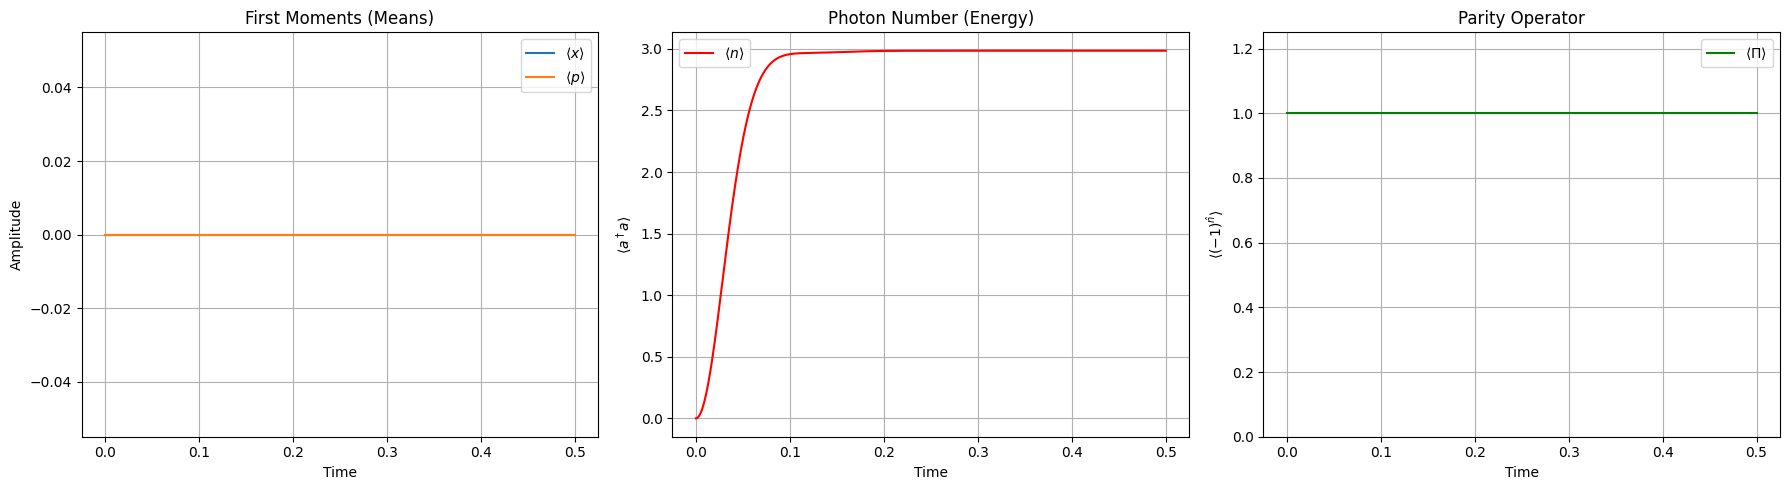

In [1]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
# Identical to your JAX setup
G = 30 + 30j    # Two-photon drive strength
delta = 0       # Detuning
U = 10         # Kerr nonlinearity
n = 10
gamma = 0      # Single-photon loss rate

# Simulation parameters
N = 100            # Hilbert space cutoff (must be high enough to capture squeezing)
t_start = 0.00
t_end = 0.5
steps = 501      # Higher resolution than the Euler step
tlist = np.linspace(t_start, t_end, steps)

# --- 2. Operators ---
a = qt.destroy(N)
n_op = a.dag() * a
x_op = (a + a.dag()) / np.sqrt(2) # Position quadrature
p_op = 1j * (a.dag() - a) / np.sqrt(2) # Momentum quadrature

# Parity operator defined as exp(i * pi * n)
# Equivalently, it is a diagonal matrix with entries (-1)^n
parity_op = (1j * np.pi * n_op).expm() 

# --- 3. Hamiltonian Construction ---
# H_detuning = delta * a^dag * a
H_det = -delta * n_op

# H_kerr = (U/2) * a^dag^2 * a^2 (Standard Kerr form)
H_kerr = 0.5 * U * a.dag()**2 * a**2

# H_drive = G * a^dag^2 + G* * a^2 (Two-photon drive)
# Note: In some conventions, this might be i(G a^dag^2 - G* a^2).
# Based on your JAX summation, it implies a direct Hermitian addition:
H_drive = (G/2 * a.dag()**2) + (np.conj(G)/2 * a**2)

# Total Hamiltonian
# To simulate the "Only G term" case, set delta=0 and U=0 here.
H = H_drive + H_det + H_kerr

# --- 4. Dissipation ---
# Single photon loss: sqrt(gamma) * a
c_ops = [np.sqrt(gamma) * a, np.sqrt(n) * a**2]

# --- 5. Initial State ---
# Vacuum state
psi0 = (qt.coherent(N, 2) + qt.coherent(N, -2)).unit()
psi0 = qt.basis(N, 0)

print(np.pi*qt.wigner(psi0, 0, 0))

# --- 6. Solve Master Equation ---
result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=[x_op, p_op, n_op, parity_op], options={"store_final_state":True})

# --- 7. Plotting & Verification ---
means_x = result.expect[0]
means_p = result.expect[1]
means_n = result.expect[2]
means_parity = result.expect[3]

fig, ax = qt.plot_wigner(result.final_state, xvec=np.linspace(-5,5,100), yvec=np.linspace(-5,5,100), colorbar=True, cmap='RdBu_r')


# Add plot customizations (optional)
ax.set_title("Wigner function final")
plt.show()

print(f"{'Time':<8} | {'<X>':<10} | {'<P>':<10} | {'<n>':<10} | {'<Parity>':<10}")
print("-" * 65)
for i in range(0, len(tlist), 1): # Print every 10th step
    print(f"{tlist[i]:.4f}   | {means_x[i]:.6f}   | {means_p[i]:.6f}   | {means_n[i]:.6f}   | {means_parity[i]:.6f}")

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Plot Means
ax[0].plot(tlist, means_x, label=r'$\langle x \rangle$')
ax[0].plot(tlist, means_p, label=r'$\langle p \rangle$')
ax[0].set_title("First Moments (Means)")
ax[0].set_xlabel("Time")
ax[0].set_ylabel("Amplitude")
ax[0].legend()
ax[0].grid(True)

# Plot Photon Number
ax[1].plot(tlist, means_n, label=r'$\langle n \rangle$', color='r')
ax[1].set_title("Photon Number (Energy)")
ax[1].set_xlabel("Time")
ax[1].set_ylabel(r"$\langle a^\dagger a \rangle$")
ax[1].legend()
ax[1].grid(True)

# Plot Parity
ax[2].plot(tlist, means_parity, label=r'$\langle \Pi \rangle$', color='g')
ax[2].set_title("Parity Operator")
ax[2].set_xlabel("Time")
ax[2].set_ylabel(r"$\langle (-1)^{\hat{n}} \rangle$")
ax[2].set_ylim([0,1.25])
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()

Time     | <p1>       | <p2>       | <n1>       | <n2>      
-----------------------------------------------------------------
0.0000   | 1.000000   | 1.000000   | 0.000000   | 0.000000
0.0250   | 0.999978   | 0.999998   | 0.001224   | 0.000001
0.0500   | 0.999820   | 0.999976   | 0.004757   | 0.000012
0.0750   | 0.999383   | 0.999885   | 0.010298   | 0.000058
0.1000   | 0.998530   | 0.999656   | 0.017445   | 0.000175
0.1250   | 0.997147   | 0.999209   | 0.025741   | 0.000406
0.1500   | 0.995157   | 0.998469   | 0.034713   | 0.000794
0.1750   | 0.992526   | 0.997373   | 0.043880   | 0.001381
0.2000   | 0.989276   | 0.995879   | 0.052745   | 0.002196
0.2250   | 0.985481   | 0.993978   | 0.060845   | 0.003259
0.2500   | 0.981263   | 0.991689   | 0.067812   | 0.004575
0.2750   | 0.976784   | 0.989062   | 0.073380   | 0.006131
0.3000   | 0.972231   | 0.986170   | 0.077354   | 0.007900
0.3250   | 0.967802   | 0.983106   | 0.079603   | 0.009842
0.3500   | 0.963696   | 0.979971   | 0.080090  

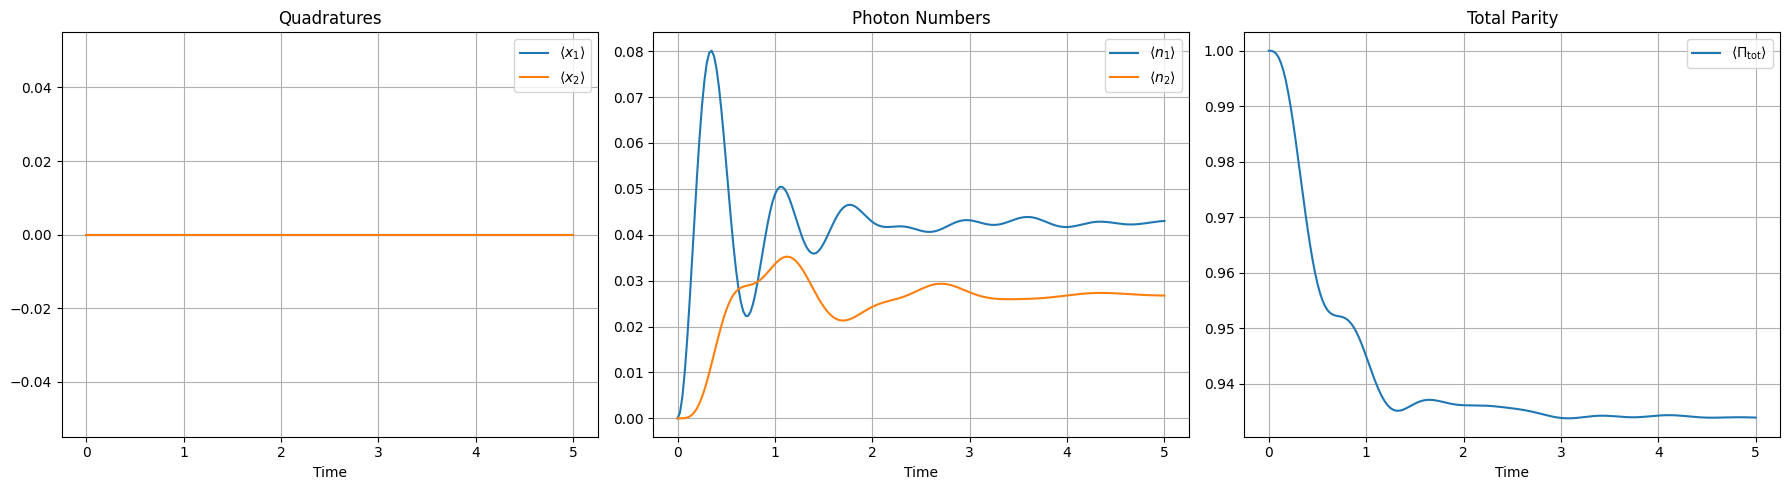

In [18]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
G = 1 + 1j        # Two-photon drive strength (per site)
delta = 1.0       # Detuning
U = 10.0           # Kerr nonlinearity
gamma = 1.0      # Single-photon loss rate
J = 2.0           # Hopping strength

# Simulation parameters
N = 20             # Local Hilbert space cutoff (reduce vs single-site!)
t_start = 0.0
t_end = 5
steps = 201
tlist = np.linspace(t_start, t_end, steps)

# --- 2. Operators (two sites) ---
a1 = qt.tensor(qt.destroy(N), qt.qeye(N))
a2 = qt.tensor(qt.qeye(N), qt.destroy(N))

n1 = a1.dag() * a1
n2 = a2.dag() * a2
n_tot = n1 + n2

x1 = (a1 + a1.dag()) / np.sqrt(2)
p1 = 1j * (a1.dag() - a1) / np.sqrt(2)

x2 = (a2 + a2.dag()) / np.sqrt(2)
p2 = 1j * (a2.dag() - a2) / np.sqrt(2)

# Parity operators
parity_1 = (1j * np.pi * n1).expm()
parity_2 = (1j * np.pi * n2).expm()
parity_tot = (1j * np.pi * n_tot).expm()

# --- 3. Hamiltonian ---
# Detuning
H_det = -delta * (n1 + n2)

# Kerr nonlinearity
H_kerr = 0.5 * U * (a1.dag()**2 * a1**2 + a2.dag()**2 * a2**2)

H_drive = (
    (G / 2) * (a1.dag()**2)
    + (np.conj(G) / 2) * (a1**2)
)

# Hopping
H_hop = -J * (a1.dag() * a2 + a2.dag() * a1)

# Total Hamiltonian
H = H_det + H_kerr + H_drive + H_hop

# --- 4. Dissipation ---
c_ops = [
    np.sqrt(gamma) * a1,
    np.sqrt(gamma) * a2,
]

# --- 5. Initial State ---
# Vacuum on both sites
psi0 = qt.tensor(qt.basis(N, 0), qt.basis(N, 0))

# --- 6. Solve Master Equation ---
result = qt.mesolve(
    H,
    psi0,
    tlist,
    c_ops,
    e_ops=[
        x1, p1, n1, parity_1,
        x2, p2, n2, parity_2,
        parity_tot
    ],
    options={"store_final_state": True},
)

# --- 7. Extract expectations ---
x1_m, p1_m, n1_m, par1_m = result.expect[0:4]
x2_m, p2_m, n2_m, par2_m = result.expect[4:8]
par_tot_m = result.expect[8]


print(f"{'Time':<8} | {'<p1>':<10} | {'<p2>':<10} | {'<n1>':<10} | {'<n2>':<10}")
print("-" * 65)
for i in range(0, len(tlist), 1): # Print every 10th step
    print(f"{tlist[i]:.4f}   | {par1_m[i]:.6f}   | {par2_m[i]:.6f}   | {n1_m[i]:.6f}   | {n2_m[i]:.6f}")

# --- 8. Plot observables ---
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# First moments
ax[0].plot(tlist, x1_m, label=r'$\langle x_1 \rangle$')
ax[0].plot(tlist, x2_m, label=r'$\langle x_2 \rangle$')
ax[0].set_title("Quadratures")
ax[0].set_xlabel("Time")
ax[0].legend()
ax[0].grid(True)

# Photon numbers
ax[1].plot(tlist, n1_m, label=r'$\langle n_1 \rangle$')
ax[1].plot(tlist, n2_m, label=r'$\langle n_2 \rangle$')
ax[1].set_title("Photon Numbers")
ax[1].set_xlabel("Time")
ax[1].legend()
ax[1].grid(True)

# Parity
ax[2].plot(tlist, par_tot_m, label=r'$\langle \Pi_{\mathrm{tot}} \rangle$')
ax[2].set_title("Total Parity")
ax[2].set_xlabel("Time")
ax[2].legend()
ax[2].grid(True)

plt.tight_layout()
plt.show()


N0: 0.1218827542838439
N1: 0.023130610382026524
N2: 0.12258480538196653


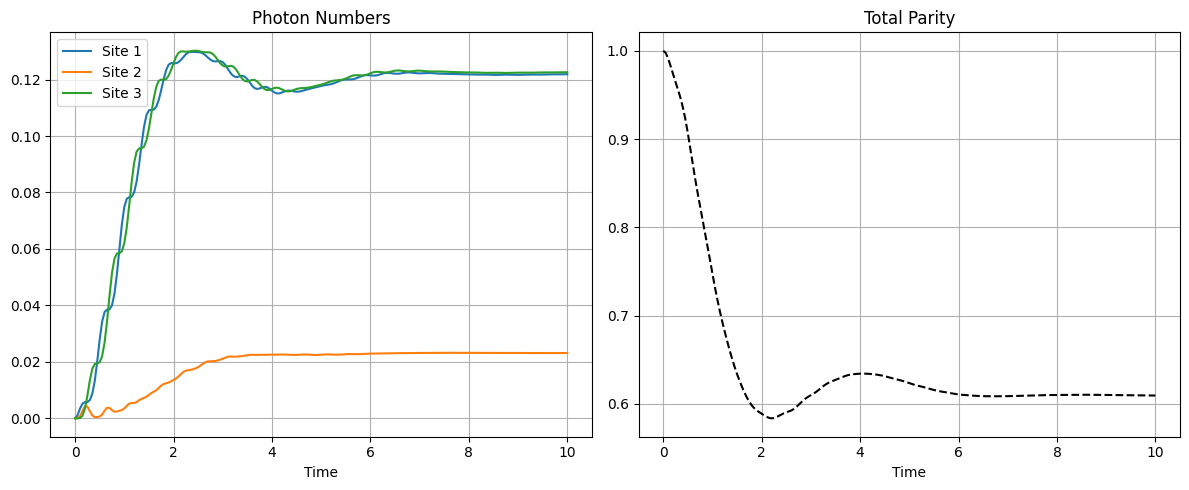

In [26]:
import numpy as np
import qutip as qt
import matplotlib.pyplot as plt

# --- 1. Parameters ---
num_sites = 3      # Number of sites (M)
S = 1 + 1j
G = 0          # Two-photon drive strength
delta = 1.0        # Detuning
U = 10           # Kerr nonlinearity
gamma = 1.0       # Single-photon loss rate
J = 10           # Hopping strength

# Simulation parameters
N = 6            # Local Hilbert space cutoff (Keep small for many sites!)
tlist = np.linspace(0, 10, 201)

# --- 2. Construct Operators ---
# We create a list of annihilation operators for each site in the tensor space
a_ops = []
for i in range(num_sites):
    op_list = [qt.qeye(N)] * num_sites
    op_list[i] = qt.destroy(N)
    a_ops.append(qt.tensor(op_list))

# Derived operators
n_ops = [a.dag() * a for a in a_ops]
x_ops = [(a + a.dag()) / np.sqrt(2) for a in a_ops]

# --- 3. Build Hamiltonian ---
H = (G / 2) * (a_ops[0].dag()**2) + (np.conj(G) / 2) * (a_ops[0]**2)
H += (S / 2) * (a_ops[0].dag()) + (np.conj(S) / 2) * (a_ops[0])

# Local terms: Detuning, Kerr, and Drive
for i in range(num_sites):
    H += -delta * n_ops[i] 
    H += 0.5 * U * (a_ops[i].dag()**2 * a_ops[i]**2)

# Interaction terms: Hopping (Nearest Neighbor)
for i in range(num_sites - 1):
    H += -J * (a_ops[i].dag() * a_ops[i+1] + a_ops[i+1].dag() * a_ops[i])

# --- 4. Dissipation and Initial State ---
c_ops = [np.sqrt(gamma) * a for a in a_ops]

# Initial state: Vacuum on all sites
psi0 = qt.tensor([qt.basis(N, 0)] * num_sites)

# --- 5. Parity Operator ---
# Total parity is the product of local parities
parity_tot = (1j * np.pi * sum(n_ops)).expm()

# --- 6. Solve Master Equation ---
# Define which expectation values to track
e_ops = n_ops + [parity_tot]

result = qt.mesolve(H, psi0, tlist, c_ops, e_ops=e_ops, options={"store_final_state":True})

# --- 7. Data Extraction & Plotting ---
plt.figure(figsize=(12, 5))

# Plot Photon Numbers for each site
plt.subplot(1, 2, 1)
for i in range(num_sites):
    plt.plot(tlist, result.expect[i], label=f'Site {i+1}')
    print(f"N{i}: {result.expect[i][-1]}")
plt.title("Photon Numbers")
plt.xlabel("Time")
plt.legend()
plt.grid(True)

# Plot Total Parity
plt.subplot(1, 2, 2)
plt.plot(tlist, result.expect[-1], color='black', linestyle='--')
plt.title("Total Parity")
plt.xlabel("Time")
plt.grid(True)

plt.tight_layout()
plt.show()